*This notebook can be found on* [github](https://github.com/qojulia/QuantumOptics.jl-examples/tree/master/notebooks/quantum-kicked-top.ipynb)

# Quantum kicked top

The kicked top is a simple dynamical system, Hamiltonian in character and capable of chaotic motion [1]. It has a single degree of freedom and its two dimensional classical phase space is a sphere. Chaos is possible due to periodic driving, for simplicity chosen as a sequence of (delta function) kicks. Due to the compactness of the classical phase space and the finiteness of the quantum mechanical Hilbert space the dynamics is relatively easy to treat theoretically and numerically. Experimental realizations of both the classical and the quantum cases are available.

The quantum kicked top can be descirbed by the time-dependent Hamiltonian [2]
\begin{align}
H = \alpha J_z + \frac{k}{2J} J_y^2 \sum_{n = - \infty}^{\infty} \tau \delta(t-n\tau)
\end{align}
where $J_i (i = x, y, z)$ are components of the  (pseudo-) angular momentum operator, $J \equiv j + 1/2$, and
we set 􏰒$\hbar = 1$. $J_z$ generates a precession of the (pseudo-) angular momentum vector about the $z$-axis with precession angle $\alpha$. “Pseudo” refers to the fact that the physical system need not be an actual physical spin, but can be any system with $2j + 1$ basis states on which the $J_i$ act accordingly. For a physical spin-$j$ in a magnetic field $B$ in $z$-direction, $\alpha$ is directly proportional to $B$. The $J_y^2$-term is the non-linearity, assumed to act instantaneously compared to the precession, controlled by the kicking strength $k$ and applied periodically with a period $\tau$ that leads to chaotic behavior. The system can be described stroboscopically with discrete time $t$ in units of $\tau$ (set to $\tau = 1$ in the following),
\begin{align}
| \psi(t) \rangle = U_\alpha(k)|\psi(t-1)\rangle = U_\alpha^t(k)|\psi(0)\rangle
\end{align}
with the unitary Floquet operator
\begin{align}
U_\alpha(k) = T \exp \left(-i \int_t^{t+1} \mathrm{d}t^\prime\, H(t^\prime) \right) = e^{-i \frac{k}{2J}J_y^2}e^{-i\alpha J_z}
\end{align}
that propagates the state of the system from right after a kick to right after the next kick. $T$ denotes time-ordering.

States that correspond most closely to classical phase space points located at $(\theta, \phi)$ are coherent spin states (SU(2)-coherent states) [3], defined as
\begin{align}
|j,\theta,\phi \rangle = \sum_{m=-j}^j \sqrt{{2j}\choose{j-m}}\sin(\theta/2)^{j-m}\cos(\theta/2)^{j+m}e^{i(j-m)\phi}|jm\rangle
\end{align}
in the Dicke basis $|jm\rangle$ . They are localized at polar and azimuthal angles $\theta,\phi$ with smallest possible uncertainty of all spin-$j$ states (associated circular area $\sim 1/j$ in phase space). They remain coherent states under the action of $U_\alpha(0)$, i.e., just get rotated, $\phi 􏰑\rightarrow \phi + \alpha$.

As always, we start by importing the required libraries and define the necessary paramters.

In [39]:
using QuantumOptics
using PyPlot

# Parameters
k = 30;
j = 15;
α = π/2;

Then we proceed to define the spin basis and write our Floquet operator accordingly.

In [40]:
# Floquet operator
b = SpinBasis(j)
    # operators creation
    Jx = 0.5*sigmax(b)
    Jy = 0.5*sigmay(b)
    Jz = 0.5*sigmaz(b)
FO = expm(full(-1im*k*Jy*Jy/(2*(j+1/2))))*expm(full(-1im*α*Jz));

Now, we can define the initial state as the eigenstate of $J_y$ operator and see its SU(2) Q function.

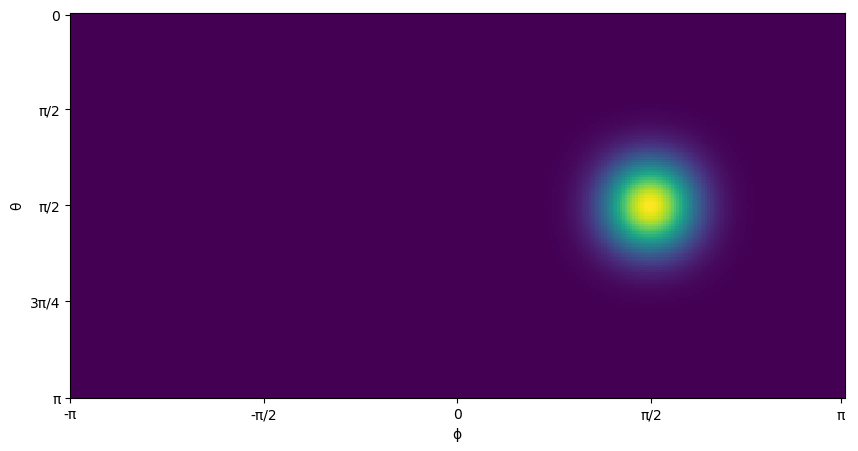

In [41]:
# initial coherent spint state
θ = π/2
ϕ = π/2
ψ₀ = coherentspinstate(b,θ,ϕ)

# SU(2) Q function
res = 150 # resolution of the SU(2) Q function
figure(figsize=(10,5))
wx=[-1pi:pi/(res):1pi;];
wy=[0:1pi/res:1pi;];
qsu2=qfuncsu2(ψ₀,res)
pcolor(wx,wy,qsu2)
# appealing plot :-)
yticks([0.0, pi/4,pi/2,3pi/4,pi-0.02], ["π","3π/4","π/2","π/2",0] ) # North pole means θ = 0
xticks([-π,-π/2,0,π/2,π-0.03],["-π","-π/2",0,"π/2","π"] ) 
ylabel("θ")
xlabel("ϕ");

Now, it is time for some Floquet dynamics

In [45]:
# Stroboscopic Floquet dynamics
ψ = ψ₀;
for i=1:100000
    ψ = normalize(FO*ψ)
end

Finally, we can plot the SU(2) Q function of the final state

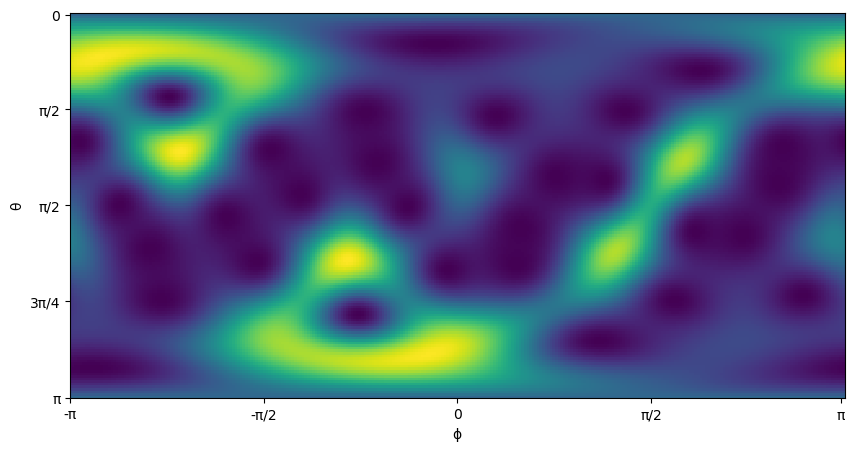

In [46]:
figure(figsize=(10,5))
wx = [-1pi:pi/(res):1pi;];
wy = [0:1pi/res:1pi;];
qsu2final = qfuncsu2(ψt[end],res)
pcolor(wx,wy,qsu2final)
yticks([0.0, pi/4,pi/2,3pi/4,pi-0.02], ["π","3π/4","π/2","π/2",0] ) 
xticks([-π,-π/2,0,π/2,π-0.03],["-π","-π/2",0,"π/2","π"] ) 
ylabel("θ")
xlabel("ϕ");


but more interestingly, we can plot its SU(2) Wigner function [4] which reveals us quantum chaos

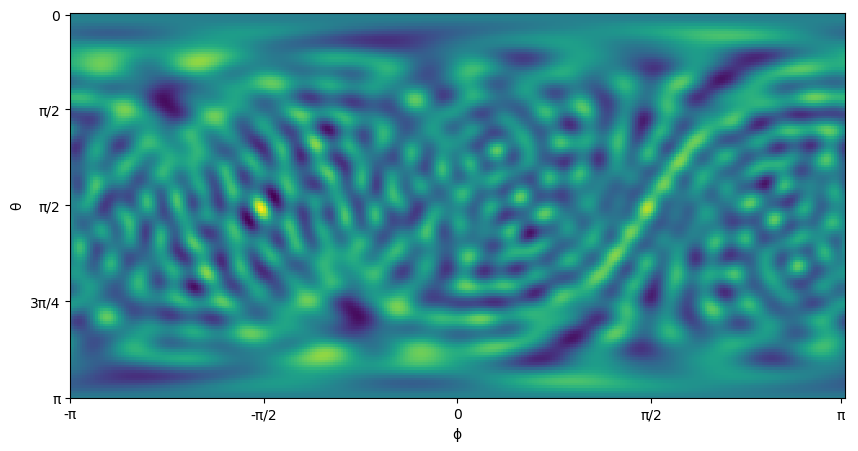

In [47]:
figure(figsize=(10,5))
wx = [-1pi:pi/(res):1pi;];
wy = [0:1pi/res:1pi;];
wsu2 = wignersu2(ψt[end],res)
pcolor(wx,wy,wsu2)
yticks([0.0, pi/4,pi/2,3pi/4,pi-0.02], ["π","3π/4","π/2","π/2",0] ) 
xticks([-π,-π/2,0,π/2,π-0.03],["-π","-π/2",0,"π/2","π"] ) 
ylabel("θ")
xlabel("ϕ");

**References**

[1] Haake, F., Kuś, M. & Scharf, R. Z. *Classical and quantum chaos for a kicked top*, Physik B - Condensed Matter  65: 381, (1987). 

https://doi.org/10.1007/BF01303727

[2] Fiderer, L. J. & Braun, D. *Quantum metrology with quantum-chaotic sensors*, Nature Communications 9, 1351, (2018). 

https://doi.org/10.1038/s41467-018-03623-z

[3] Radcliffe, J. M. *Some properties of coherent spin states*, Journal of Physics A: General Physics, 4(3), 313, (1971). 

https://doi.org/10.1088/0305-4470/4/3/009

[4] Dowling, J. P., Agarwal, G. S., & Schleich, W. P. *Wigner distribution of a general angular-momentum state: Applications to a collection of two-level atoms*,  Phys. Rev. A 49, 4101 (1994). 

https://doi.org/10.1103/PhysRevA.49.4101